In [1]:
# a bit of setup, as usual
import time

import psycopg2 as ps
import psycopg2.extras as e

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Visualization
First, let's connect to the Census dataset and plot some examples visualizations (views)

In [2]:
# connect to Census database
con = ps.connect("dbname='seedb' user='dthai' host='localhost' password=''")
cur = con.cursor()

# capital gain group-by sex for the target data (married)
query = "SELECT sex, avg(capital_gain) FROM census WHERE marital_status in (' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',' Separated') GROUP BY sex;"
cur.execute(query)
target_rows = cur.fetchall()

# capital gain group-by sex for the reference data (unmarried)
query = "SELECT sex, avg(capital_gain) FROM census WHERE marital_status in (' Never-married', ' Widowed',' Divorced') GROUP BY sex;"
cur.execute(query)
ref_rows = cur.fetchall()

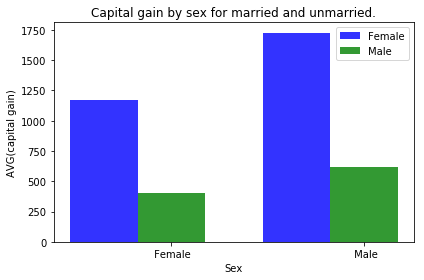

In [8]:
target_data = dict(target_rows)
ref_data = dict(ref_rows)

n_groups = len(target_data)

means_frank = target_data.values()
means_guido = ref_data.values()
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Female')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Male')
 
plt.xlabel('Sex')
plt.ylabel('AVG(capital gain)')
plt.title('Capital gain by sex for married and unmarried.')
plt.xticks(index + bar_width, target_data.keys())
plt.legend()
 
plt.tight_layout()
plt.show()

In [5]:
dict(ref_rows)

{' Female': 403.919852232573, ' Male': 621.721987136087}

In [6]:
dict(target_rows)

{' Female': 1169.38770053476, ' Male': 1725.75760775655}